# **Using pandas read_html to Web Scrape Data for Data Science** 

Tarun Badarvada

<i>[Data Professor YouTube channel](http://youtube.com/dataprofessor), http://youtube.com/dataprofessor </i>

In this Jupyter notebook, I will be showing you how to easily web scrape data using pandas read_html() function for your data science project. We will be web scraping BoxOfficeMojo data and perform a quick data exploration.

## **URL to the webpage "Box Offce Data from Box Office Mojo"**

### Method 1

We could modularize the URL and year strings of text that may be useful for programmatic access (in the subsequent code cell).

In [1]:
# The Building Blocks
url = 'https://www.boxofficemojo.com/weekend/by-year/2016/'

# Combining the URL + year strings together
url

'https://www.boxofficemojo.com/weekend/by-year/2016/'

## **Read HTML webpage into pandas**

In [2]:
import pandas as pd

### Using pd.read_html() function to read HTML webpage

In [3]:
df = pd.read_html(url, header = 0)
df

[                                     Dates  Top 10 Gross    %± LW  \
 0   Dec 30-Jan 2, 2017New Year's long wknd  $220,396,876    -7.3%   
 1                       Dec 30-Jan 1, 2017  $166,381,697    +0.8%   
 2             Dec 23-26Christmas long wknd  $250,611,546   +47.7%   
 3                                Dec 23-25  $165,020,197   -18.9%   
 4                                Dec 16-18  $203,485,726  +184.3%   
 ..                                     ...           ...      ...   
 59                               Jan 22-24   $95,736,903   -34.2%   
 60                       Jan 15-18MLK wknd  $175,297,289   -20.6%   
 61                               Jan 15-17  $145,502,232    +1.8%   
 62                                Jan 8-10  $142,912,699     -28%   
 63                                 Jan 1-3  $198,537,624   -27.3%   
 
    Overall Gross  %± LW.1  Releases  \
 0   $246,770,071   -11.1%        68   
 1   $186,656,052    +2.9%        81   
 2   $274,763,402   +34.1%        67  

### How many tables are there in the webpage?

In [4]:
len(df)

1

### Select the first table

In [14]:
df[0]

,Dates,Top 10 Gross,%± LW,Overall Gross,%± LW.1,Releases,#1 Release,Week,Long Weekend
0,"Dec 30-Jan 2, 2017New Year's long wknd",220396876,-7.3%,"$246,770,071",-11.1%,68,Rogue One: A Star Wars Story,53,True
1,"Dec 30-Jan 1, 2017",166381697,+0.8%,"$186,656,052",+2.9%,81,Rogue One: A Star Wars Story,53,False
2,Dec 23-26Christmas long wknd,250611546,+47.7%,"$274,763,402",+34.1%,67,Rogue One: A Star Wars Story,52,True
3,Dec 23-25,165020197,-18.9%,"$181,350,322",-14.3%,82,Rogue One: A Star Wars Story,52,False
4,Dec 16-18,203485726,+184.3%,"$211,583,035",+152.7%,99,Rogue One: A Star Wars Story,51,False
...,...,...,...,...,...,...,...,...,...
59,Jan 22-24,95736903,-34.2%,"$113,596,503",-31.6%,87,The Revenant,4,False
60,Jan 15-18MLK wknd,175297289,-20.6%,"$200,759,295",-20%,57,Ride Along 2,3,True
61,Jan 15-17,145502232,+1.8%,"$166,004,623",+4.2%,86,Ride Along 2,3,False
62,Jan 8-10,142912699,-28%,"$159,323,600",-27.4%,91,Star Wars: Episode VII - The Force Awakens,2,False


In [6]:
df2016 = df[0]

In [7]:
df2016.drop('Genre', inplace = True,axis = 1)

In [8]:
df2016.drop('Budget', inplace = True,axis = 1)

In [9]:
df2016.drop('Running Time', inplace = True,axis = 1)

In [10]:
df2016['Top 10 Gross'] = df2016['Top 10 Gross'].str.replace('\W','')

C:\Users\badar\AppData\Local\Temp\ipykernel_4584\265775261.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2016['Top 10 Gross'] = df2016['Top 10 Gross'].str.replace('\W','')


In [11]:
df2016['Top 10 Gross'] = df2016['Top 10 Gross'].astype('int64')

In [12]:
df2016['Top 10 Gross']

0     220396876
1     166381697
2     250611546
3     165020197
4     203485726
        ...    
59     95736903
60    175297289
61    145502232
62    142912699
63    198537624
Name: Top 10 Gross, Length: 64, dtype: int64

In [13]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Dates          64 non-null     object
 1   Top 10 Gross   64 non-null     int64 
 2   %± LW          64 non-null     object
 3   Overall Gross  64 non-null     object
 4   %± LW.1        64 non-null     object
 5   Releases       64 non-null     int64 
 6   #1 Release     64 non-null     object
 7   Week           64 non-null     int64 
 8   Long Weekend   64 non-null     bool  
dtypes: bool(1), int64(3), object(5)
memory usage: 4.2+ KB


## Data cleaning

We can see that the table header is presented multiple times in several rows.

In [15]:
df2016[df2016.Releases == 'Releases']

,Dates,Top 10 Gross,%± LW,Overall Gross,%± LW.1,Releases,#1 Release,Week,Long Weekend


In [16]:
df2016.shape

(64, 9)

In [17]:
len(df2016[df2016.Releases == 'Releases'])

0

In [18]:
df = df2016.drop(df2016[df2016.Releases == 'Releases'].index)

In [19]:
df.shape

(64, 9)

## Quick Exploratory Data Analysis

In [20]:
import seaborn as sns

In [21]:
import matplotlib.pyplot as plt

Making the Line Plot of # of Releases during 2022

<AxesSubplot: xlabel='Week', ylabel='Releases'>

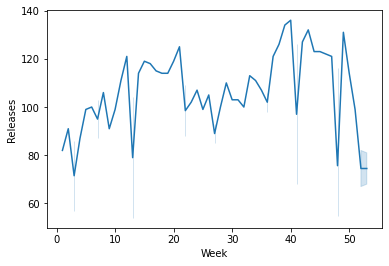

In [22]:
sns.lineplot(data = df2016, x = 'Week', y = 'Releases')

Plotted Line graph of Top 10 Gross vs. Weeks

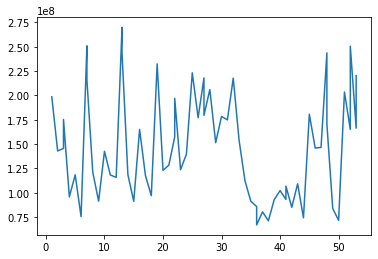

In [23]:
plt.plot(df2016['Week'],df2016['Top 10 Gross'])
plt.show()

In [25]:
#Save data fram to csv

df2016.to_csv('data2016_real.csv')